In [8]:
import tensorflow as tf



In [9]:
tf.__version__

'1.15.0'

# 矩阵常量与变量

In [10]:
# 常量 常量类型为int时可以省略
hello = tf.constant('hello',dtype=tf.string)
a = tf.constant(1)
# 变量创建
a = tf.Variable(1.0,dtype=tf.float32)
b = tf.Variable(1.0,dtype=tf.float64)
# 示例
input1 = tf.constant(1)
print(input1)
input2 = tf.Variable(2,tf.int32)
print(input2)
input2 = input1
sess = tf.Session()
print(sess.run(input2))

Tensor("Const_6:0", shape=(), dtype=int32)
<tf.Variable 'Variable_5:0' shape=() dtype=int32_ref>
1


In [11]:
# 占位符 与传入参数的类型
input1 = tf.placeholder(tf.float32)

# 示例
input1 = tf.placeholder(tf.int32)
input2 = tf.placeholder(tf.int32)

output = tf.add(input1,input2)

sess = tf.Session()
print(sess.run(output,feed_dict={input1:[1],input2:[2]}))





[3]


# 矩阵计算 

In [12]:
## ------------
## 常量矩阵定义
## ------------
# 当输入的值个数与设定的维度不相符时，会使用已输入的值进行补完
tensor = tf.constant([1,2,3],shape=[2,3])
print(sess.run(tensor))

## ------------
## 生成随机矩阵张量
## ------------
"""
random_normal:正态分布随机数，均值mean，标准差stddev
truncated_normal:截断正态分布随机数，均值mean，标准差stddev，不过只保留[mean-2*stddev,mean+2*stddev]范围内的随机数
random_uniform:均匀分布随机数
"""
tf.random_normal(shape=[2,3],mean=0.0,stddev=1.0,dtype=tf.float32,seed=None,name=None)
tf.truncated_normal(shape=[2,3],mean=0.0,stddev=1.0,dtype=tf.float32,seed=None,name=None)
tf.random_uniform(shape=[2,3],minval=0,maxval=None,dtype=tf.float32,seed=None,name=None)
# 获取矩阵张量的形状
tf.shape(tensor)
# 将矩阵重新排列
"""
shape = [-1] 表示要将tensor展开成一个list
shape = [a,b,c,...] 其中a,b,c均大于0，那么就是常规用法
shape = [a,-1,c,...] 此时b=-1,a,c,....依然大于0，这表示tf会根据tensor的原尺寸自动计算b的值
"""
tf.reshape(tensor,shape=[3,2],name=None)

[[1 2 3]
 [3 3 3]]


<tf.Tensor 'Reshape_1:0' shape=(3, 2) dtype=int32>

### 常用矩阵函数
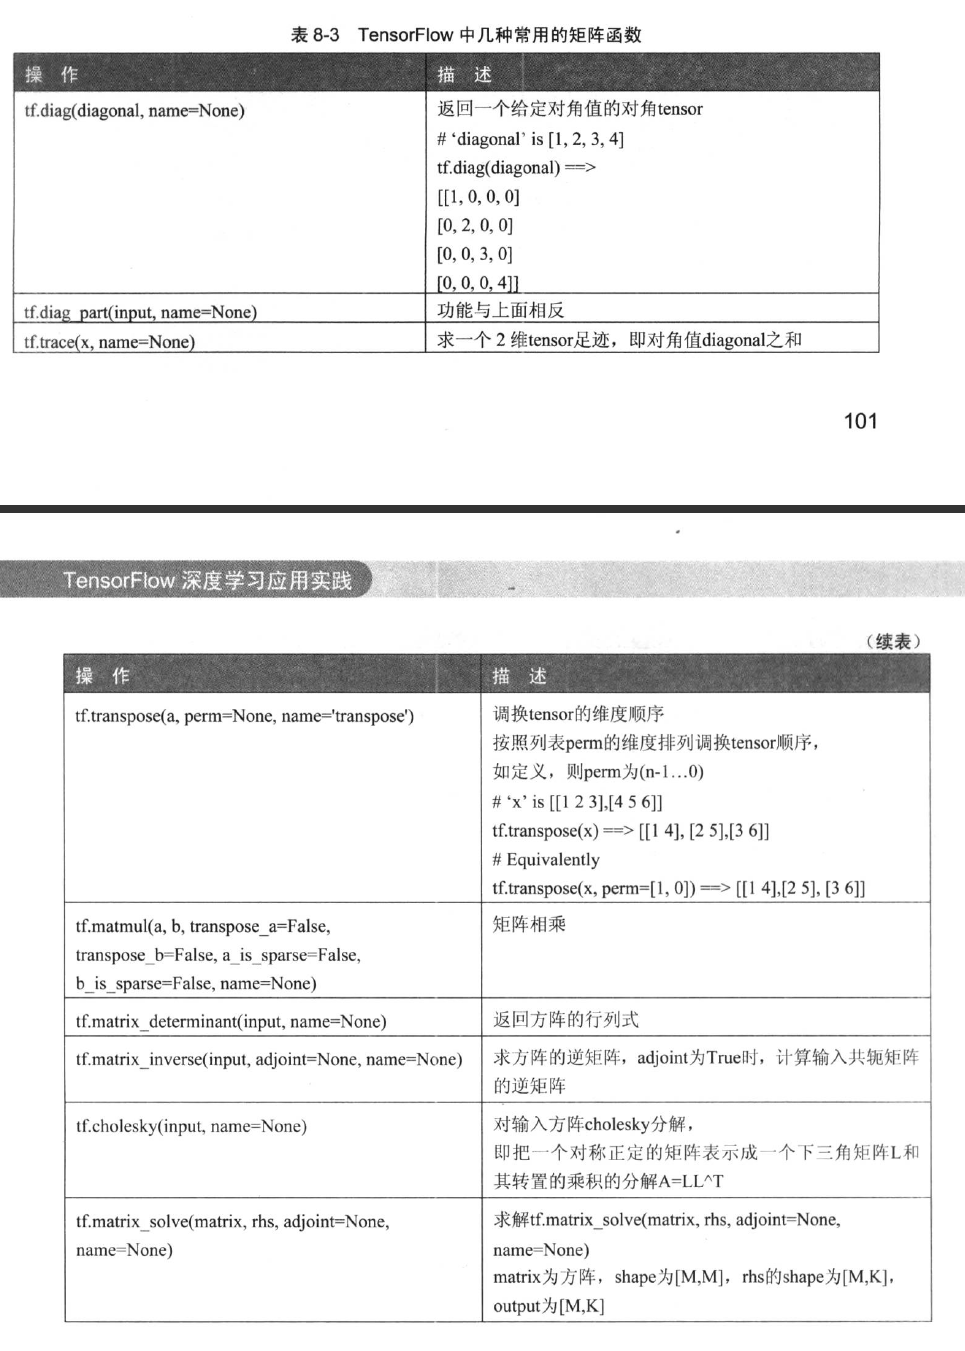

## 通过tensorflow实现输入层，隐藏层和输出层

In [48]:
import numpy as np
"""
输入 
输出 = 函数（输入）+噪音
"""
# 范围[0,1)，形状（3000，1）
inputX = np.random.rand(3000,1)
# 参数：均值，标准差，维度
noise = np.random.normal(0,0.05,inputX.shape)

outputY = inputX*4+1+noise

# 这里是第一层,第一层的权重和和偏置项，因为这两个值需要根据误差算法不停的重新赋值，因此被设置成为变量
weight1 = tf.Variable(np.random.rand(inputX.shape[1],4))
bias = tf.Variable(np.random.rand(inputX.shape[1],4))
##占位，不停的输入数据
x1 = tf.placeholder(tf.float64,[None,1])
# 矩阵相乘，y1_为神经网络选择的模型函数y=x*w+b
y1_ = tf.matmul(x1,weight1)+bias


#这里是第二层
weight2 = tf.Variable(np.random.rand(4,1))
bias2 = tf.Variable(np.random.rand(inputX.shape[1],1))
y2_ = tf.matmul(y1_,weight2)+bias2



##占位，真实值y
y = tf.placeholder(tf.float64,[None,1])
# 损失函数的计算，最小二乘法【正常求法】，reduction_indices=[1] 轴为1
loss = tf.reduce_mean(tf.reduce_sum(tf.square((y2_ - y)),reduction_indices=[1]))
# 选择梯度下降法,learning_rate = 0.25
train = tf.train.GradientDescentOptimizer(0.25).minimize(loss)
#初始化所有的变量
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)
#问题：循环一千次，权重也会更新一千次，那么梯度下降带来的权重更新在哪里体现？？
#for循环设置了循环次数，这里也可以使用固定的循环次数，可以设置损失函数的值为计算门槛
for i in range(1000):
    #在计算train时，需要的变量只有inputX和outputY，因为需要使用feed_dict给他放值
    sess.run(train,feed_dict={x1:inputX,y:outputY})
#     更新权重,打印权重，，或者我理解错误，这里不是初始化，而是按照sess跑的结果更新权重和偏置项
    print(weight1.eval(sess))
    print('--------------------')
    print(weight2.eval(sess))
    print('--------------------')
#     更新偏置项，打印偏置项
    print(bias.eval(sess))
    print('--------------------')
#     更新偏置项，打印偏置项
    print(bias2.eval(sess))
    print('--------------结果是----------------')
    
    x_data = np.matrix([[1.],[2.],[3.]])
    #打印y1 x.shape = (3,1) weight.shape = (1,4)
    print(sess.run(y1_,feed_dict={x1:x_data}))
    

[[0.41293129 0.30415924 0.33169419 0.73652626]]
--------------------
[[0.66145077]
 [0.97390158]
 [0.42006943]
 [1.07987277]]
--------------------
[[0.74983252 1.03834461 0.65042373 1.05886122]]
--------------------
[[1.24340659]]
--------------结果是----------------
[[1.16276381 1.34250385 0.98211792 1.79538748]
 [1.57569509 1.64666309 1.31381211 2.53191375]
 [1.98862638 1.95082232 1.64550631 3.26844001]]
[[ 0.16350098 -0.06309496  0.17328778  0.32931078]]
--------------------
[[-0.21446955]
 [-0.13811386]
 [-0.3297357 ]
 [-0.21489243]]
--------------------
[[0.11451652 0.10292314 0.24695179 0.02165561]]
--------------------
[[0.28291788]]
--------------结果是----------------
[[ 0.27801751  0.03982818  0.42023956  0.3509664 ]
 [ 0.44151849 -0.02326677  0.59352734  0.68027718]
 [ 0.60501947 -0.08636173  0.76681511  1.00958796]]
[[-0.02936192 -0.18729459 -0.12322884  0.1360676 ]]
--------------------
[[ 0.09955417]
 [-0.04476391]
 [ 0.18621354]
 [ 0.11282154]]
--------------------
[[-0.198235

### 反向传播算法
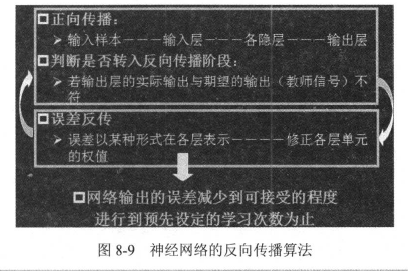

# 最小二乘法和范数
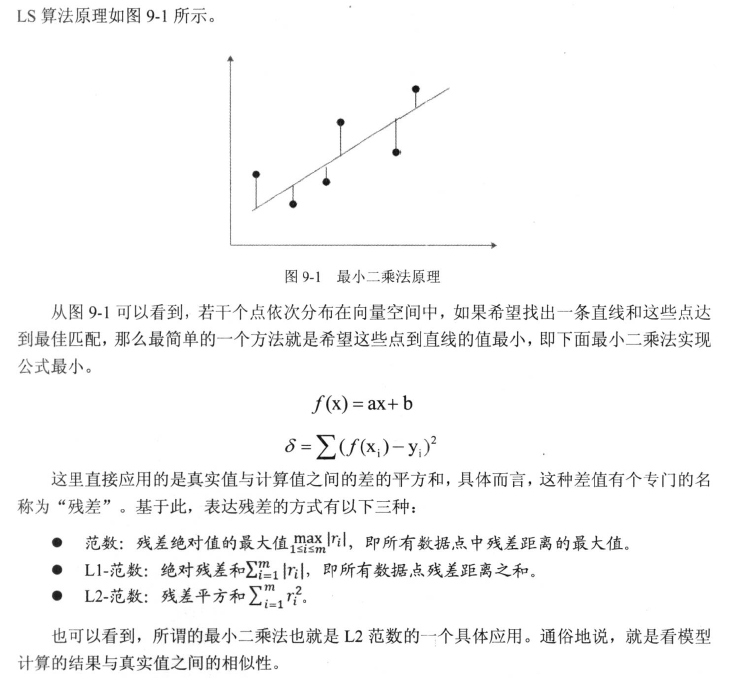